# Explore here

In [1]:
# Your code here
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pickle import dump


dataset = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DATOS:
- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [36]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
dataset.shape

(768, 9)

In [4]:
class_counts1 = dataset['Insulin'].value_counts()
print(class_counts1)

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64


We have 374 zeros, so after reviewing all the data, the best option is delete those zeros.

In [5]:
nan_check = dataset.isna().any().any()
nan_check

False

There is no any null value

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
dataset = dataset[dataset['Insulin'] > 0]
dataset = dataset[dataset['Glucose'] > 0]
dataset = dataset[dataset['BMI'] > 0]


Filtering the data because the zeros were causing worse accuracy

In [43]:
dataset.shape

(392, 9)

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

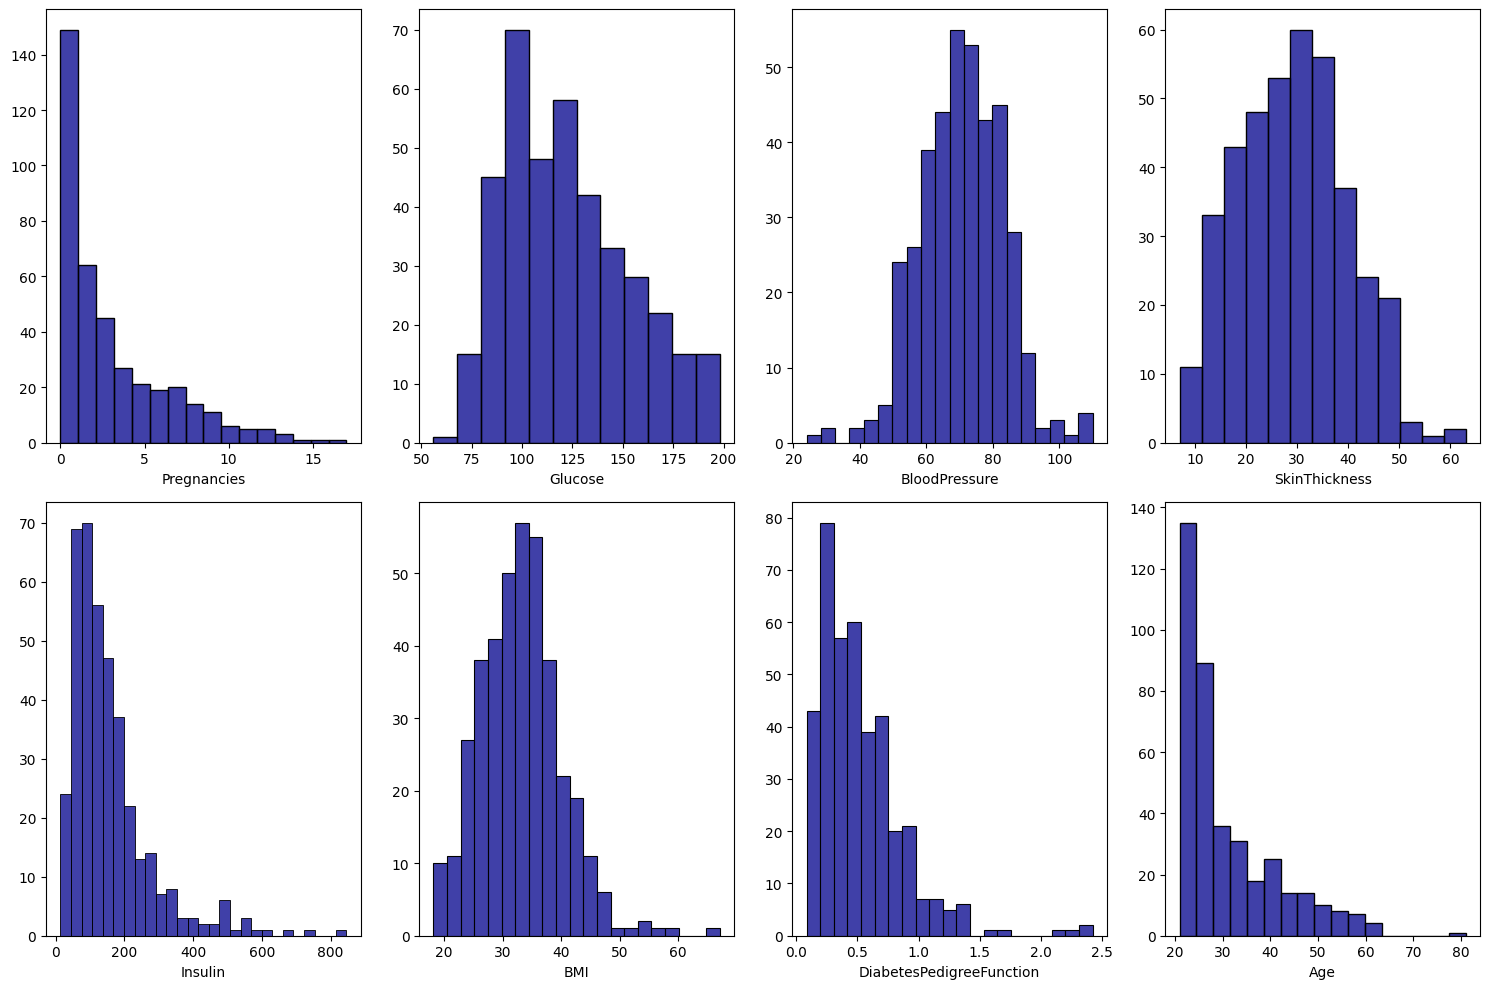

In [45]:
fig, axis = plt.subplots(2, 4, figsize = (15, 10))
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for col, ax in zip(cols, axis.ravel()):
    sns.histplot(ax = ax, data = dataset, x = col, color = 'darkblue').set(ylabel = None)
plt.tight_layout()
plt.show()

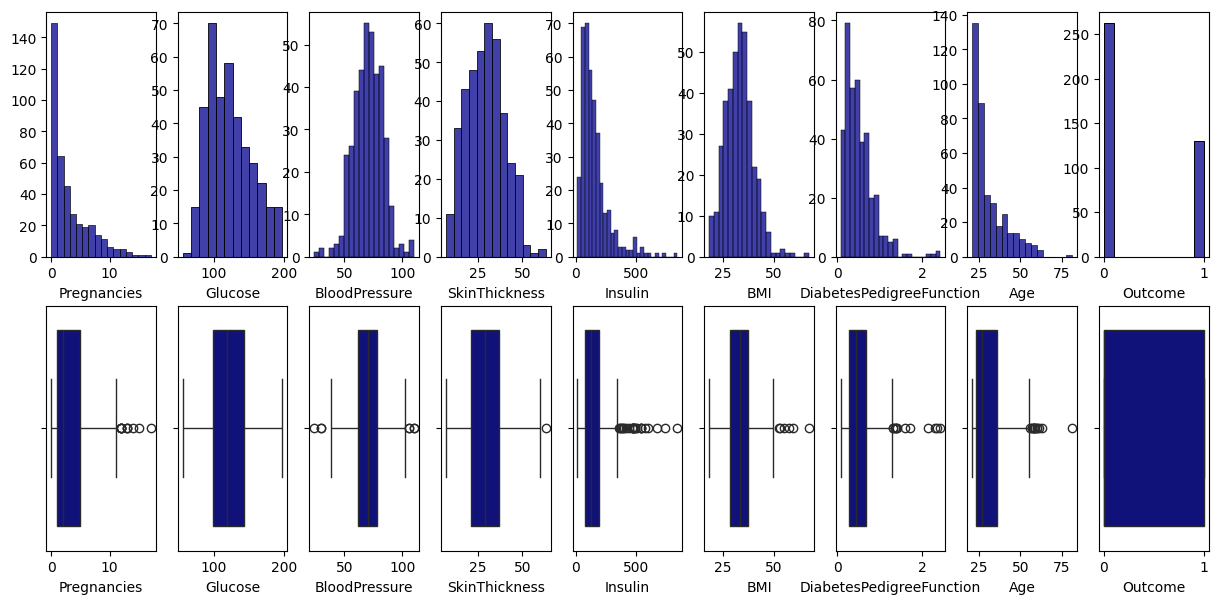

In [46]:
fig, axis = plt.subplots(2, 9, figsize = (15, 7))

x_data = []
for i in dataset.columns:
    x_data.append(i)

for i, col in enumerate(x_data):
    sns.histplot(ax=axis[0, i], data=dataset, x=col, color='darkblue').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=dataset, x=col, color='darkblue')

plt.show()

<Axes: >

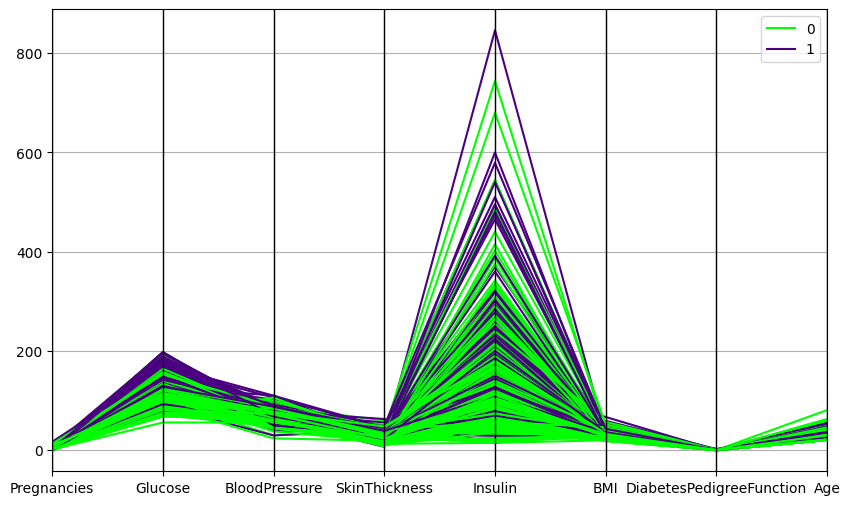

In [47]:
fig, axis = plt.subplots(figsize = (10, 6))
pd.plotting.parallel_coordinates(dataset, "Outcome", color = ("lime", "indigo", "peru"))

AS the plot shows, the insulin is the highest value even for the ones who does no have diabetes

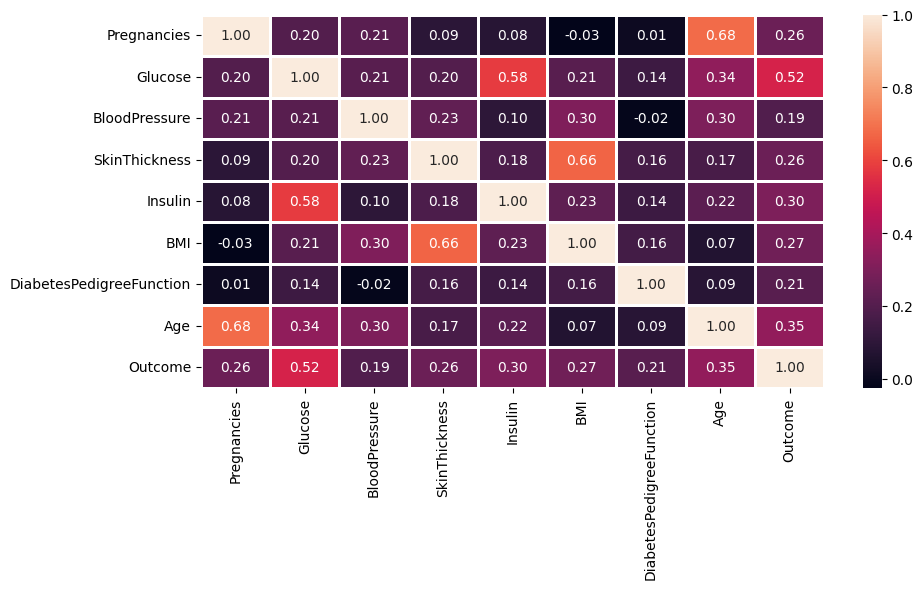

In [48]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

The plot show us:
- The insulin is really corralated to the glucose.
- The age is very related to the pregnancies.
- The BMI is really related to the SkinThickness.
- The outcome seems to be realted to the gloucose and also a little to the age. 

In [49]:
#select x and y data
X = dataset.drop('Outcome', axis= 1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [54]:
#Save the data without transforming
X_train_sel = X_train.copy()
X_test_sel = X_test.copy()  

X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values

X_train_sel.to_csv(r'C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\Decision-tree-project\decision-tree\data\processed\X_train_sel.csv', index=False)
X_test_sel.to_csv(r'C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\Decision-tree-project\decision-tree\data\processed\X_test_sel.csv', index=False)

In [55]:
model = DecisionTreeClassifier(random_state = 12)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

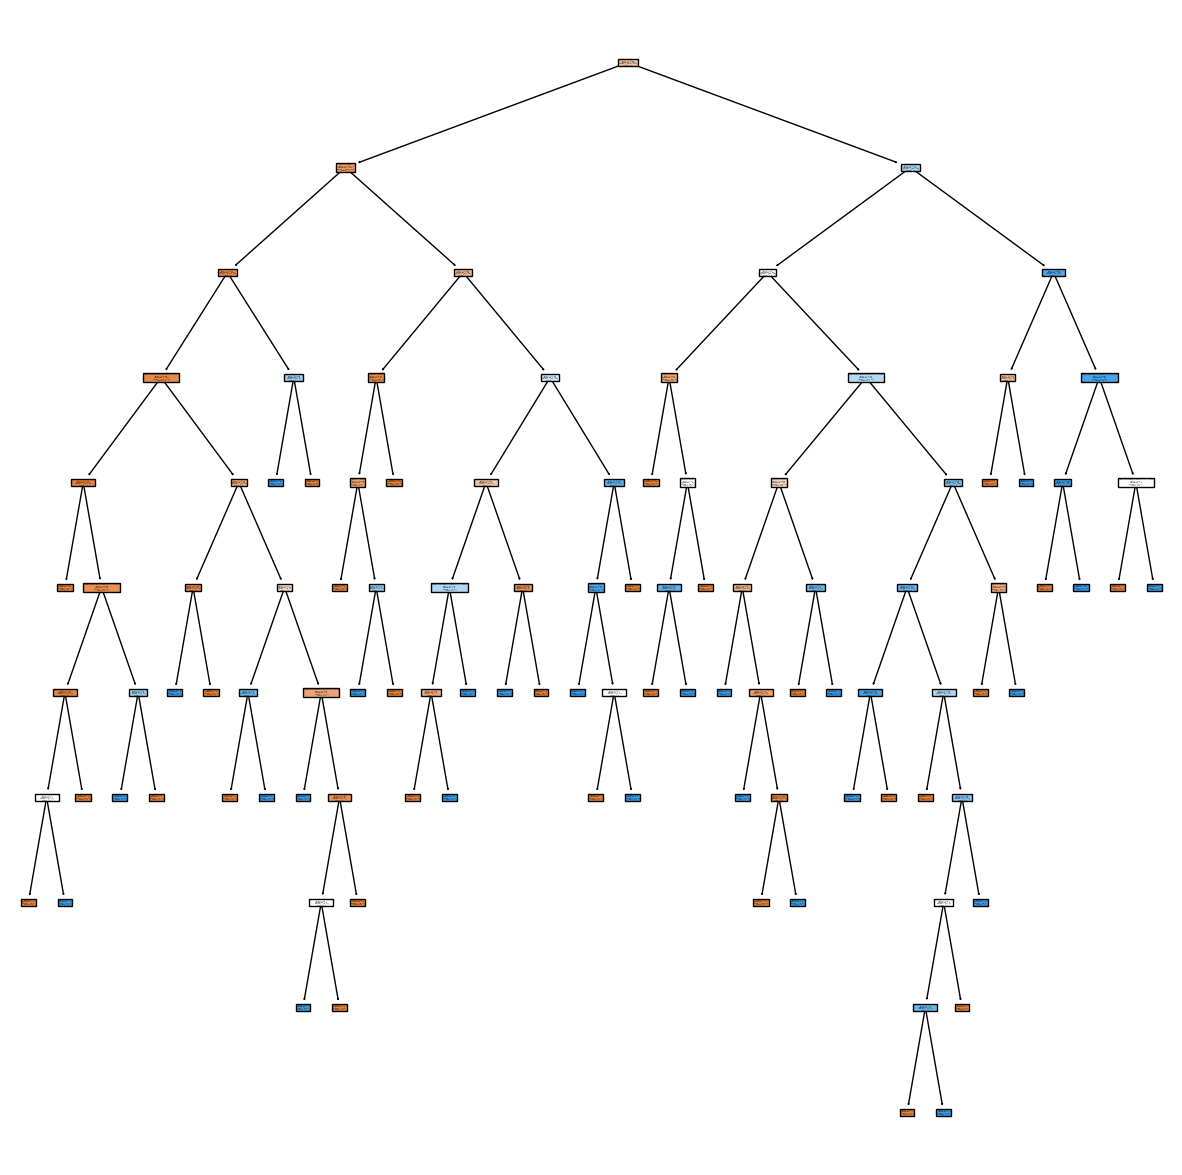

In [ ]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [57]:
accuracy_score(y_test, y_pred)

0.7974683544303798

hyperparameter optimization

In [70]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [73]:
model_grid = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state= 28)
model_grid.fit(X_train, y_train)
y_pred1 = model_grid.predict(X_test)
y_pred1

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [74]:
acc_grid = accuracy_score(y_test, y_pred1)
print(f"the new accuracy is {acc_grid}")

the new accuracy is 0.8607594936708861


With the hyperparameters optimization the accuracy is beter. 

In [75]:
#saving the model ready

dump(model_grid, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_28.sav", "wb"))